In [2]:
import keras
from keras.layers import Input, Lambda
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_path = './Datasets/Thermal_Fusion(Dataset)/Training/'

In [3]:
# useful for getting number of output classes
folders = glob('./Datasets/Thermal_Fusion(Dataset)/Training/*')

In [4]:
len(folders)

2

In [5]:
input_shape=(227,227,3)

np.random.seed(1000)

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())

# 1st Fully Connected Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd  Fully Connected Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

#  Fully Connected Output Layer

model.add(Dense(1))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0

In [6]:
model.compile(optimizer='Adagrad',  #Adamax , RMSprop , Adagrad(Not performed well), 
              loss='binary_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'])

print("model compiled")
print(model.summary())

model compiled
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 1

In [7]:
#Total BFlops
from model_profiler import model_profiler

Batch_size = 32
profile = model_profiler(model, Batch_size)

print(profile)

| Model Profile                    | Value         | Unit    |
|----------------------------------|---------------|---------|
| Selected GPUs                    | None Detected | GPU IDs |
| No. of FLOPs                     | 0.0122        | BFLOPs  |
| GPU Memory Requirement           | 0.1723        | GB      |
| Model Parameters                 | 24.7693       | Million |
| Memory Required by Model Weights | 94.4873       | MB      |


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 50

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.5,1.0],
        fill_mode='constant')

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./Datasets/Thermal_Fusion(Dataset)/Training/',
                                                 target_size = (227, 227),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

test_set = validation_datagen.flow_from_directory('./Datasets/Thermal_Fusion(Dataset)/Testing/',
                                            target_size = (227, 227),
                                            batch_size = 50,
                                            class_mode = 'binary',
                                            shuffle=False)

Found 1204 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [9]:
len(training_set)

25

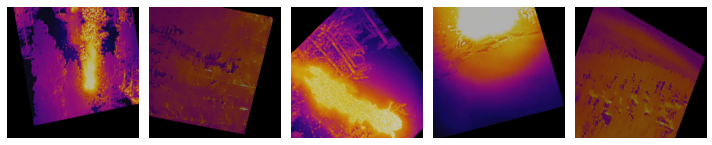

[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1.]


In [10]:
imgs ,labels = next(training_set)
from matplotlib import pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [6]:
print(training_set.class_indices)

print(test_set.class_indices)

{'Fire': 0, 'No_Fire': 1}
{'Fire': 0, 'No_Fire': 1}


In [31]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_AlexNet_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [61]:
len(training_set), len(test_set)

(25, 5)

In [ ]:
history = model.fit(training_set,
          steps_per_epoch= 25,
          epochs=5, 
          validation_data=test_set,
          validation_steps= 5,
          callbacks=callbacks_list)

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 8.6885 - accuracy: 0.4302 - auc: 0.5000 - precision: 0.4302 - recall: 1.0000
Epoch 00001: val_accuracy did not improve from 0.83028
25/25 [==============================] - 79s 3s/step - loss: 8.6885 - accuracy: 0.4302 - auc: 0.5000 - precision: 0.4302 - recall: 1.0000 - val_loss: 6.9951 - val_accuracy: 0.5413 - val_auc: 0.5000 - val_precision: 0.5413 - val_recall: 1.0000
Epoch 2/5
25/25 [==============================] - ETA: 0s - loss: 8.6885 - accuracy: 0.4302 - auc: 0.5000 - precision: 0.4302 - recall: 1.0000
Epoch 00002: val_accuracy did not improve from 0.83028
25/25 [==============================] - 76s 3s/step - loss: 8.6885 - accuracy: 0.4302 - auc: 0.5000 - precision: 0.4302 - recall: 1.0000 - val_loss: 6.9951 - val_accuracy: 0.5413 - val_auc: 0.5000 - val_precision: 0.5413 - val_recall: 1.0000
Epoch 3/5
25/25 [==============================] - ETA: 0s - loss: 8.6885 - accuracy: 0.4302 - auc: 0.5000 - precisi

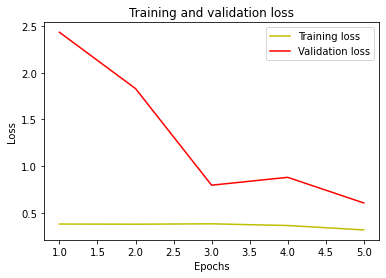

In [63]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

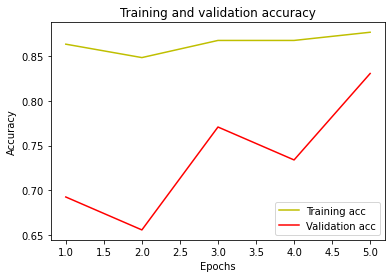

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
model.evaluate(test_set)

5/5 [==============================] - 1s 289ms/step - loss: 0.6057 - accuracy: 0.8303 - auc_1: 0.8936 - precision_1: 0.7613 - recall_1: 1.0000   


[0.6057109236717224,
 0.8302752375602722,
 0.8935593962669373,
 0.7612903118133545,
 1.0]

In [7]:
from keras.models import load_model
model = load_model("FirevsNonFire_AlexNet_transfer_learning_model_weights-improvement-05-0.83.hdf5")

In [68]:
test_set.reset()

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [70]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_set, 218 // 50+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Fire', 'No Fire']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[100   0]
 [118   0]]
Classification Report
              precision    recall  f1-score   support

        Fire       0.46      1.00      0.63       100
     No Fire       0.00      0.00      0.00       118

    accuracy                           0.46       218
   macro avg       0.23      0.50      0.31       218
weighted avg       0.21      0.46      0.29       218



C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


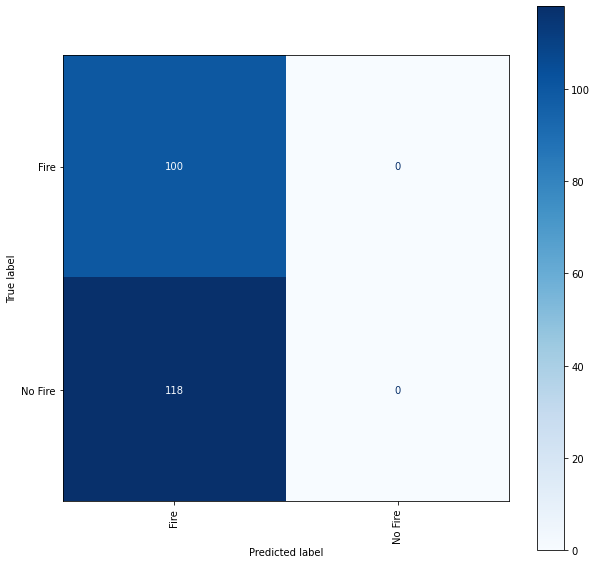

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ['Fire','No Fire']

cm = confusion_matrix(test_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))

disp.plot(cmap=plt.cm.Blues,ax=ax, xticks_rotation='vertical')

plt.show()